In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('emails.csv')

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [40]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

# Data Visualization
*   To check the most used word in Not Spam and Spam Email
*   To visualize the percentage of Not Spam and Spam Email

Percentage of text classified as Spam or Not Spam (Legitimate)

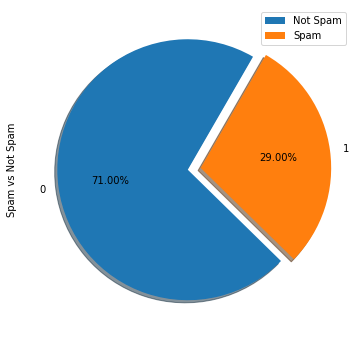

In [23]:

#Lets see what precentage of our data is spam/not spam

df["Prediction"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct='%1.2f%%', shadow = True, startangle = 60)
plt.ylabel("Spam vs Not Spam")
plt.legend(["Not Spam", "Spam"])
plt.show()



Top 10 Email messages from the dataset

In [12]:
email_grouped_df = df.groupby(by ='Prediction').count()

In [13]:
email_grouped_df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
Prediction,,,,,,,,,,,,,,,,,,,,,
0,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672,...,3672,3672,3672,3672,3672,3672,3672,3672,3672,3672
1,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,...,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


In [47]:
#top ham/spam messages message 
toptexts = df.groupby(by= 'Prediction', axis= 0)["Prediction"].agg([len, np.max]).sort_values(by = "len", ascending = False) 
display(toptexts)

,len,amax
Prediction,,
0,3672,0
1,1500,1


In [48]:
!pip install wordcloud
from wordcloud import WordCloud

You should consider upgrading via the 'C:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:
import sys
!{sys.executable} -m pip install nlp_rake

You should consider upgrading via the 'c:\Users\adewale\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [52]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(df)
res

TypeError: 'Series' object is not callable

In [ ]:
# individual ham/spam words
spam_texts = df[df["Prediction"] == "spam"]["text"]
ham_texts = texts[texts["category"] == "ham"]["text"]
spam_words = []
ham_words = []
# Since this is just classifying the message as spam or ham, we can use isalpha(). message
# This will also remove the not word in something like can't etc.
# In a sentiment analysis setting, its better to use
# sentence.translate(string.maketrans("", "", ), chars_to_remove)
def extractSpamWords(spamMessages):
 global spam_words
 words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in st
 spam_words = spam_words + words

def extractHamWords(hamMessages):
 global ham_words
 words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in sto
 ham_words = ham_words + words
spam_texts.apply(extractSpamWords)
ham_texts.apply(extractHamWords)

In [ ]:
#Spam Word cloud
spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Analysis
Several quick observations we noted through data visualization and exploration was about 71% of our data was legitimate while the remaining 29% were spam. We also captured the top spam words (“Call”, “Free”, “Txt”, “Send”, “Stop”, “Reply”) and legitimate words (“u”, “gt”, “lt” “ok”, “get”, “go”). Other insights found were that the length of spam messages tended to be more lengthy as compared to legitimate messages. We plotted the below graphs for exploratory analysis: